In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.stats.anova import anova_lm

from ISLP.models import summarize

In [60]:
auto = pd.read_csv('../datasets/Auto.csv', na_values=['?'])

# drop nans
auto = auto.dropna()
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


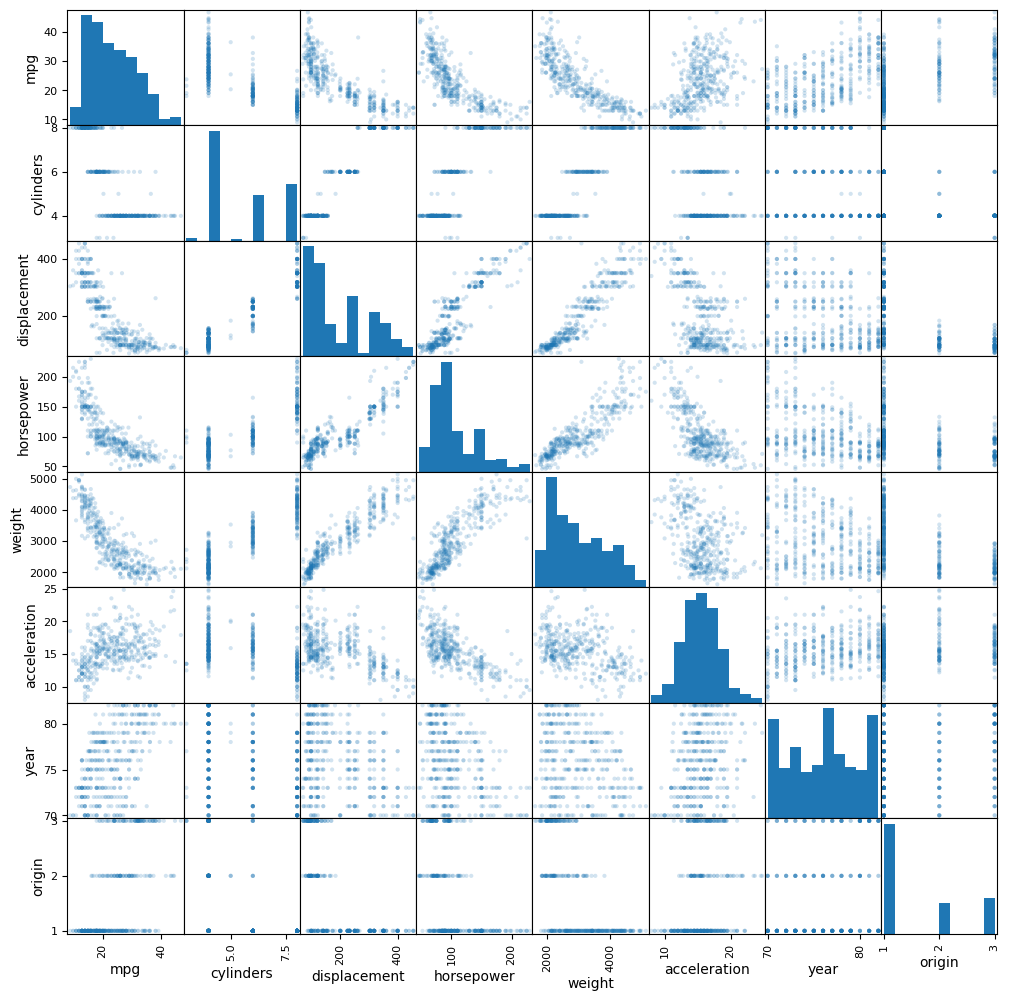

In [61]:
pd.plotting.scatter_matrix(auto, figsize=(12, 12), alpha=0.2);

In [62]:
# Matrix of correlations
auto.corr()

C:\Users\carlo\AppData\Local\Temp\ipykernel_10428\1624776239.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  auto.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


In [112]:
# Get numerical columns from the DataFrame
numeric_cols = auto.select_dtypes(include='number').columns
numeric_cols[1:]

Index(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
       'year', 'origin'],
      dtype='object')

In [119]:
# Multiple linear regression
y = auto['mpg']
X = auto['horsepower']
#X = MS(['horsepower']).fit_transform(auto)
#X['intercept'] = np.ones(X.shape[0])

X = sm.add_constant(X)
formula = "mpg ~ " + "+".join(numeric_cols[1:])
model = ols(formula=formula, data=auto[numeric_cols])

results = model.fit()

summarize(results)

,coef,std err,t,P>|t|
Intercept,-17.2184,4.644,-3.707,0.000
cylinders,-0.4934,0.323,-1.526,0.128
displacement,0.0199,0.008,2.647,0.008
horsepower,-0.0170,0.014,-1.230,0.220
weight,-0.0065,0.001,-9.929,0.000
acceleration,0.0806,0.099,0.815,0.415
year,0.7508,0.051,14.729,0.000
origin,1.4261,0.278,5.127,0.000


In [123]:
print(results.summary2())

                 Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.818    
Dependent Variable: mpg              AIC:                2062.9495
Date:               2023-12-21 18:44 BIC:                2094.7196
No. Observations:   392              Log-Likelihood:     -1023.5  
Df Model:           7                F-statistic:        252.4    
Df Residuals:       384              Prob (F-statistic): 2.04e-139
R-squared:          0.821            Scale:              11.073   
------------------------------------------------------------------
                  Coef.   Std.Err.    t    P>|t|   [0.025   0.975]
------------------------------------------------------------------
Intercept        -17.2184   4.6443 -3.7074 0.0002 -26.3499 -8.0870
cylinders         -0.4934   0.3233 -1.5261 0.1278  -1.1290  0.1422
displacement       0.0199   0.0075  2.6474 0.0084   0.0051  0.0347
horsepower        -0.0170   0.0138 -1.2295 0.2196  -0.0441  0.0102
weight       

In [121]:
a = sm.stats.anova_lm(results, typ=1)
print(a)

                 df        sum_sq       mean_sq            F         PR(>F)
cylinders       1.0  14403.083079  14403.083079  1300.683788  2.319511e-125
displacement    1.0   1073.344025   1073.344025    96.929329   1.530906e-20
horsepower      1.0    403.408069    403.408069    36.430140   3.731128e-09
weight          1.0    975.724953    975.724953    88.113748   5.544461e-19
acceleration    1.0      0.966071      0.966071     0.087242   7.678728e-01
year            1.0   2419.120249   2419.120249   218.460900   1.875281e-39
origin          1.0    291.134494    291.134494    26.291171   4.665681e-07
Residual      384.0   4252.212530     11.073470          NaN            NaN


## ANOVA (Analysis Of Variance)

https://en.wikipedia.org/wiki/Analysis_of_variance

